## APLICACIÓN DEL MODELO K-MEANS EN EL DATASET MALL CUSTOMER SEGMENTATION DATA

In [1]:
# -----------------------------------
# LIBRERIAS
# -----------------------------------

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
from sklearn.preprocessing import StandardScaler # Estandarización de valores

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Estandarización de valores


# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

# Configuración Gráficas
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")

In [2]:
# -----------------------------------
# CARGUE DE DATOS
# -----------------------------------

data = pd.read_csv("Mall_Customers.csv")

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [4]:
# -----------------------------------
# INFORMACIÓN DEL DATASET
# -----------------------------------

# Número de filas y columnas:
data.shape
print(f"Dimesiones del DataFrame: {data.shape}")

# Algunos valores del dataset:
data.head(20)

Dimesiones del DataFrame: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
# Principales medidas de tendencia central:

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# -----------------------------------
# TRATAMIENTO DE VALORES FALTANTES O NULOS
# -----------------------------------

# Valores faltantes en las variables:
data.info()

# Cantidad de valores faltantes por variable:
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# No se identifican valores faltantes o nulos

In [9]:
# -----------------------------------
# TRATAMIENTO DE VALORES ATÍPICOS
# -----------------------------------

# Conteo de Datos Atípicos

Total_Atipicos_age = (data['Age']<0).sum()
print("El total de datos atípicos de la columna Age es {}".format(Total_Atipicos_age))

Total_Atipicos_spending = ((data['Spending Score (1-100)']<0)|(data['Spending Score (1-100)']>100)).sum()
print("El total de datos atípicos de la columna Spending Score es {}".format(Total_Atipicos_spending))

El total de datos atípicos de la columna Age es 0
El total de datos atípicos de la columna Spending Score es 0


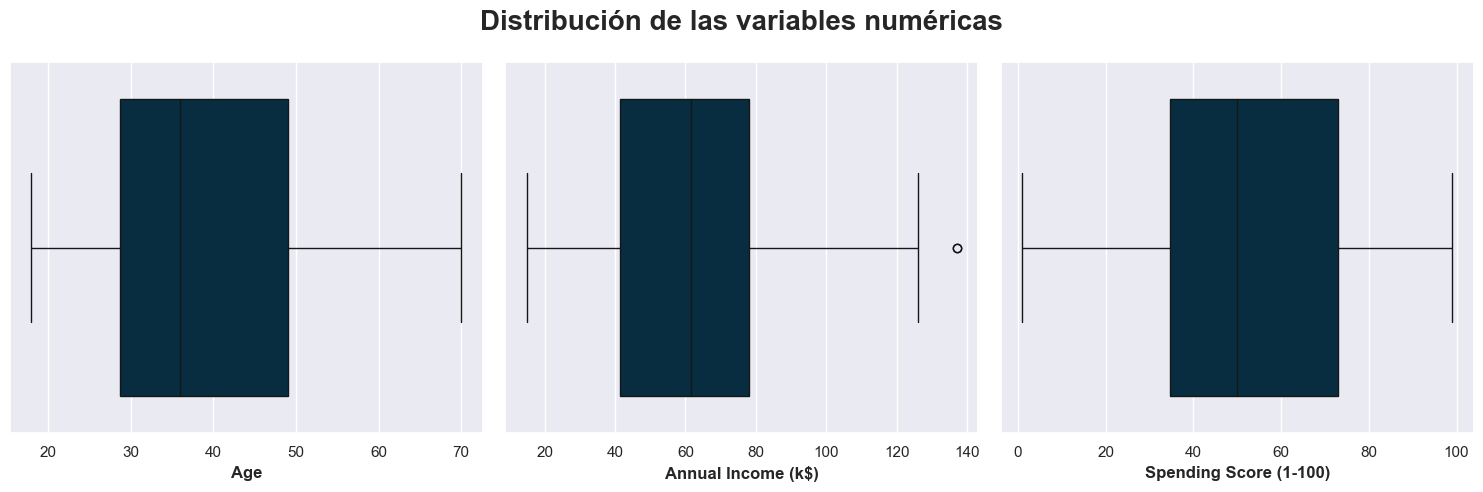

In [10]:
# -----------------------------------
# DISTRIBUCIÓN DE VARIABLES NUMÉRICAS
# -----------------------------------

# A continuación vamos a crear las gráficas de caja (box plot) para observar la distribución de las variables numéricas:

caracteristicas_num = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Creamos cada gráfica de caja de acuerdo a cada una de las variable:
for i in range(3):
    sns.boxplot(data=data, x=caracteristicas_num[i], ax=axes[i]) # Accedemos directamente al subplot con el índice i
    axes[i].set_xlabel(caracteristicas_num[i], fontweight="bold")

fig.suptitle("Distribución de las variables numéricas", fontweight= "bold", fontsize= 20)
fig.tight_layout()
plt.show()

In [11]:
# En la variable 'Annual Income (k$)', hay al menos un valor atípico notable alrededor de los 140 k$. Esto sugiere que hay al menos una persona en el conjunto de datos con un ingreso anual significativamente mayor que la mayoría. Como este valor atípico es válido y representa una parte importante de la variabilidad de los datos, se decide mantenerlo ya que eliminarlo podría llevar a una pérdida de información valiosa y sesgar los análisis o modelos. 

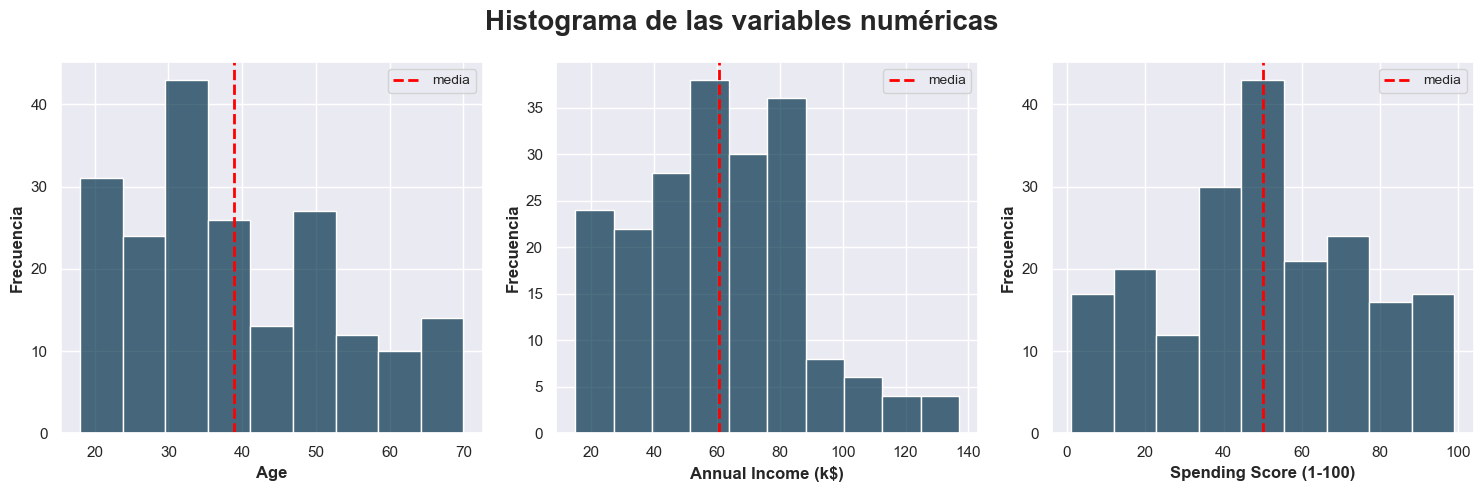

In [10]:
# -----------------------------------
# ANÁLISIS UNIVARIABLE DE VARIABLES NUMÉRICAS
# -----------------------------------

caracteristicas_num = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Creamos cada gráfica de caja de acuerdo a cada una de las variable:
for i in range(3):
    sns.histplot(data=data, x=caracteristicas_num[i], ax=axes[i], alpha=0.7) # Accedemos directamente al subplot con el índice i
    axes[i].axvline(x=data[caracteristicas_num[i]].mean(), linewidth=2, color="red", linestyle="dashed", label="media")
    axes[i].set_xlabel(caracteristicas_num[i], fontweight="bold")
    axes[i].set_ylabel("Frecuencia", fontweight="bold")
    axes[i].legend(fontsize=10)

fig.suptitle("Histograma de las variables numéricas", fontweight= "bold", fontsize= 20)
fig.tight_layout()
plt.show()

In [12]:
# -----------------------------------
# ANÁLISIS UNIVARIABLE DE VARIABLES CATEGÓRICAS
# -----------------------------------

# Resumen de datos categóricos
data.describe(include = "object")

,Gender
count,200
unique,2
top,Female
freq,112


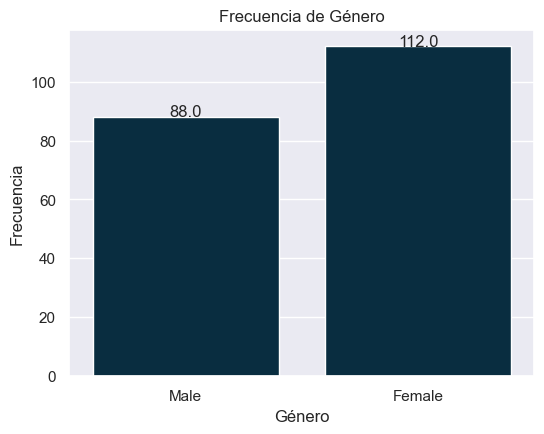

In [14]:
# -----------------------------------
# ANÁLISIS UNIVARIABLE DE VARIABLES CATEGÓRICAS
# -----------------------------------

# Crear el gráfico de frecuencia
ax = sns.countplot(data=data, x='Gender')

# Añadir etiquetas de datos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            height, ha="center")

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Género')

fig.suptitle("Frecuencia de género", fontweight= "bold", fontsize= 20)
fig.tight_layout()
plt.show()

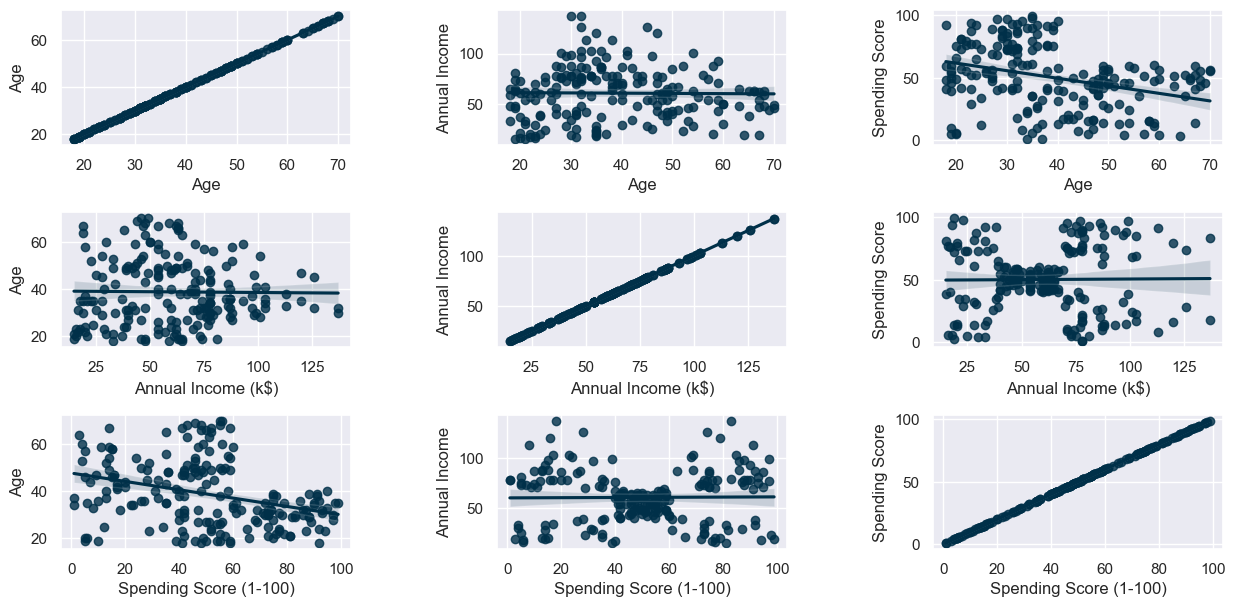

In [16]:
# -----------------------------------
# RELACIONES ENTRE VARIABLES
# -----------------------------------

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

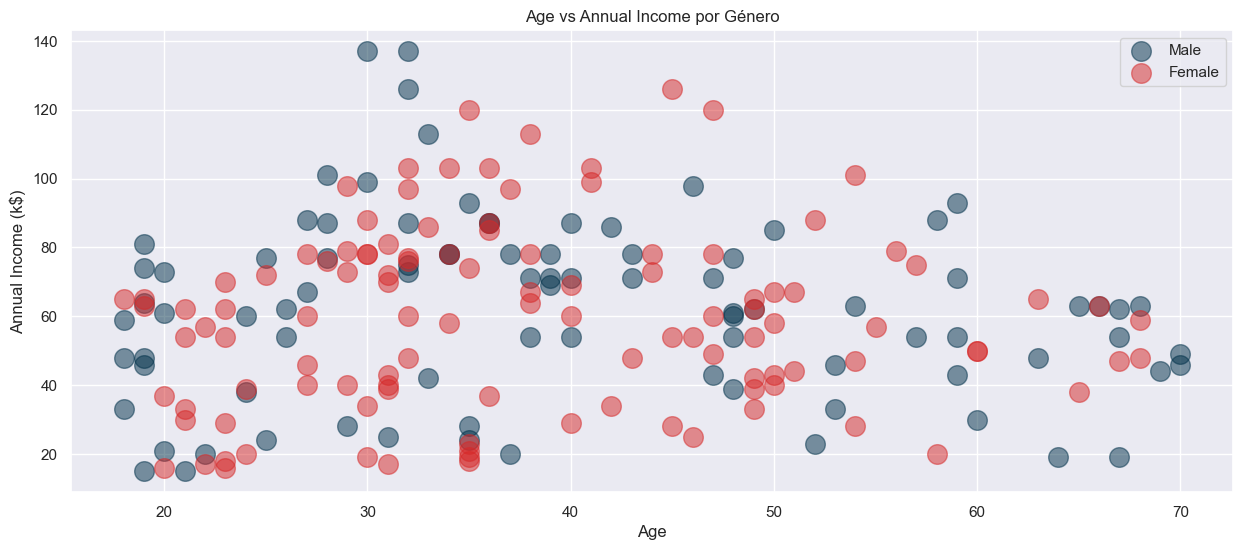

In [18]:
# -----------------------------------
# RELACIONES ENTRE VARIABLES
# -----------------------------------

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income por Género')
plt.legend()
plt.show()

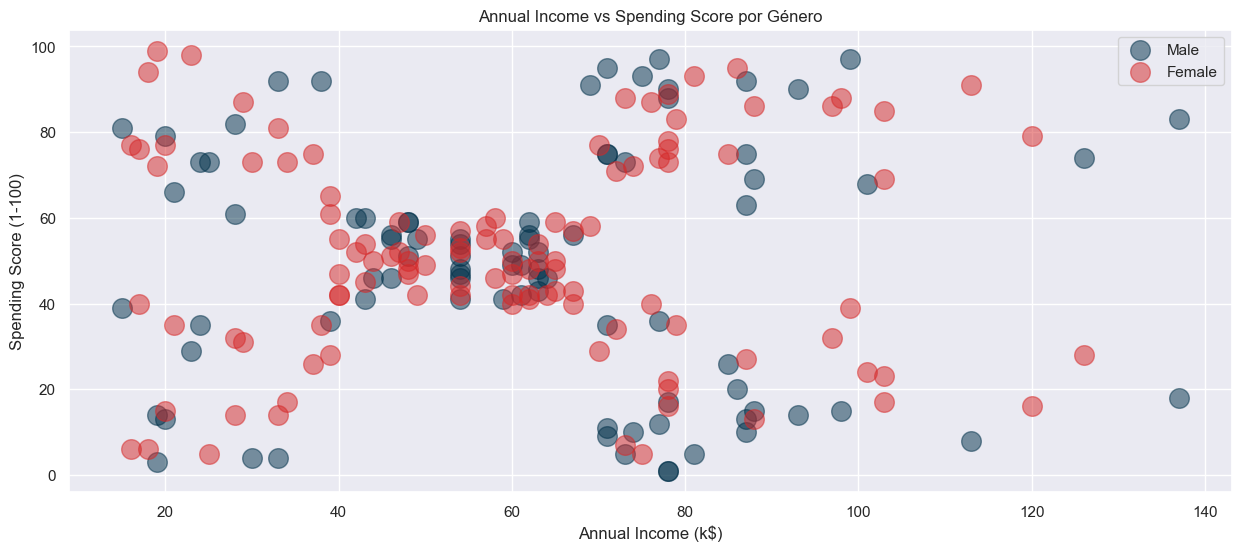

In [20]:
# -----------------------------------
# RELACIONES ENTRE VARIABLES
# -----------------------------------

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score por Género')
plt.legend()
plt.show()

In [22]:
# -----------------------------------
# MATRIZ DE CORRELACIÓN
# -----------------------------------

data_matriz = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
corr_matrix = data_matriz.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [24]:
# Viendo la matriz de correlación, podemos ver claramente que nuestras variables no están fuertemente correlacionadas. La correlación más alta que notamos es entre la variable Age y Spending Score con un 33% de correlación.

## 2. Estandarización de variables

In [27]:
# -----------------------------------
# ESTANDARIZACIÓN DE DATOS
# -----------------------------------

data_std = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(data_std), columns = data_std.columns)
data_std

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [29]:
# -----------------------------------
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# -----------------------------------

genero = data['Gender']
data_new = data_std.join(genero)

# Crear la columna 'Femenino'
data_new['Female'] = (data_new['Gender'] == 'Female').astype(int)

# Crear la columna 'Masculino'
data_new['Male'] = (data_new['Gender'] == 'Male').astype(int)

# Eliminar la columna original 'genero' si ya no la necesitas
data_new.drop(columns=['Gender'], inplace=True)

# Verificar el resultado
data_new.head(20)

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0
5,-1.209269,-1.662660,1.001596,1,0
6,-0.276302,-1.624491,-1.715913,1,0
7,-1.137502,-1.624491,1.700384,1,0
8,1.804932,-1.586321,-1.832378,0,1
9,-0.635135,-1.586321,0.846310,1,0


## 3. Selección de las características más relevantes para entrenar el modelo utilizando selección de características

In [128]:
# Características de interes para el agrupamiento:

# Edad
# Annual Income (k$)
# Spending Score (1-100)	

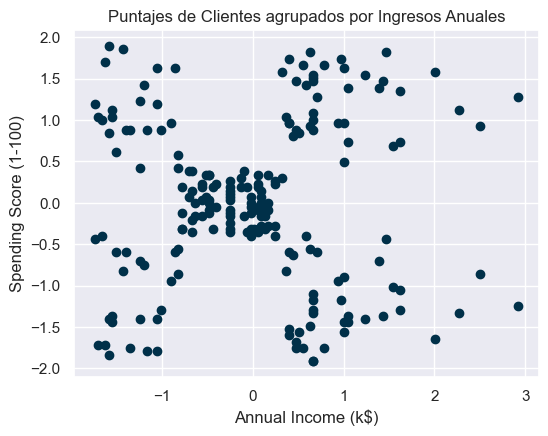

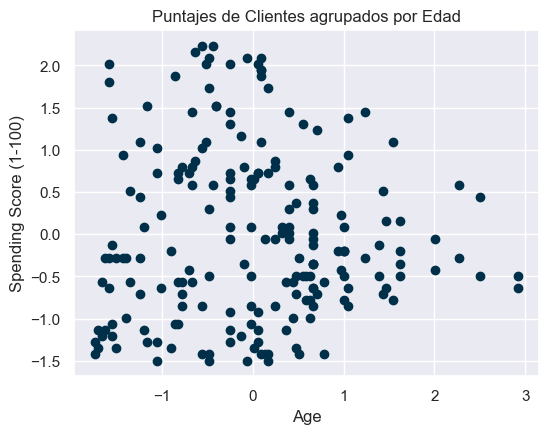

In [33]:
# Grafica antes del agrupamiento

# Spenging Score vs. Annual Inconme 
plt.scatter(data_new['Annual Income (k$)'], data_new['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Puntajes de Clientes agrupados por Ingresos Anuales')
plt.show()

# Spenging Score vs. Edad 
plt.scatter(data_new['Annual Income (k$)'], data_new['Age'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Puntajes de Clientes agrupados por Edad')
plt.show()

## 4. Segmentación de datos usando Age y Spending Score 

## 4.1. Entrenar el modelo configurando los diferentes hiperparámetros

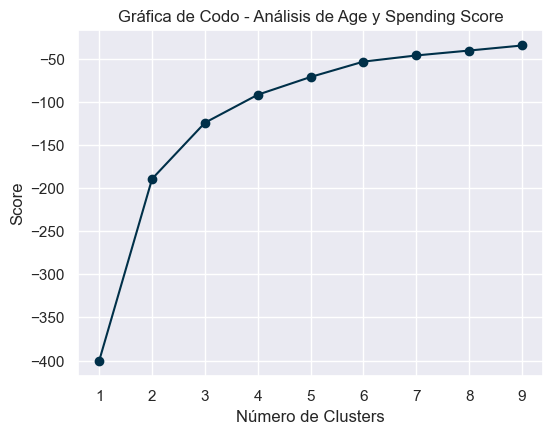

In [145]:
#Se realiza gráfica de codo para identificar valor de K

X1 = data_new[['Age', 'Spending Score (1-100)']]

Nc1 = range(1, 10)
kmeans1 = [KMeans(n_clusters=i) for i in Nc]
kmeans1
score1 = [kmeans1[i].fit(X1).score(X1) for i in range(len(kmeans1))]
score1
plt.plot(Nc1, score1, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo - Análisis de Age y Spending Score')
plt.show()

In [149]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento). Se toma este valor considerando que se realizan análisis con valores K iguales a 6, 7, 8, 9 y 10 y, para cada uno, se analizan los valores obtenidos para el Coeficiente Silhouette, el Indice Calinski Harabasz y el Indice Davies Bouldin. Estas 3 métricas se comparan para los diferentes valores de K y se elige el valor K que brinda mejores resultados.  

Modelo1 = KMeans(n_clusters=5, random_state=0)
Modelo1.fit(X1)

KMeans(n_clusters=5, random_state=0)

## 4.2. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [165]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo1.labels_
X1["Cluster"] = Modelo1.labels_ 
print (X1)

# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones1 = len(X1)
X_1 = X1.drop('Cluster', axis=1)
clusters1 = X1['Cluster']

# Se calculan las métricas
sil_score = silhouette_score(X_1, clusters1)
calinski_score = calinski_harabasz_score(X_1, clusters1)
davies_score = davies_bouldin_score(X_1, clusters1)
inertia = Modelo1.inertia_

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score],
    ["Inertia", inertia]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

          Age  Spending Score (1-100)  Cluster
0   -1.424569               -0.434801        4
1   -1.281035                1.195704        1
2   -1.352802               -1.715913        3
3   -1.137502                1.040418        1
4   -0.563369               -0.395980        4
..        ...                     ...      ...
195 -0.276302                1.118061        1
196  0.441365               -0.861839        2
197 -0.491602                0.923953        1
198 -0.491602               -1.250054        3
199 -0.635135                1.273347        1

[200 rows x 3 columns]
+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.4065419551199804 |
| Indice Calinski Harabasz | 212.35438538695192 |
|  Indice Davies Bouldin   | 0.9050719570639693 |
|         Inertia          | 74.68277474965183  |
+-----------

## 4.3. Realizar la gráfica que permite visualizar los resultados del modelo

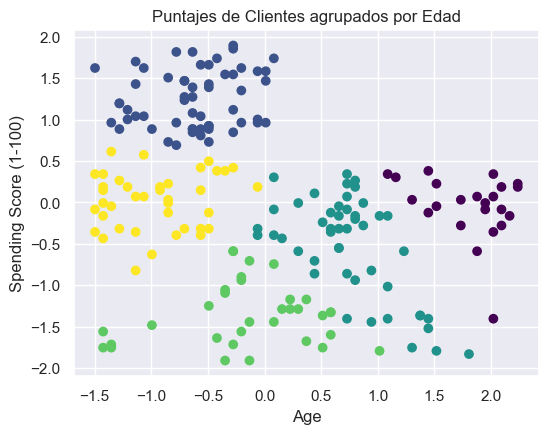

In [174]:
plt.scatter(X1['Age'], X1['Spending Score (1-100)'], c=X1['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Puntajes de Clientes agrupados por Edad')
plt.show()

## 4.4. Interpretación de los resultados obtenidos

In [ ]:
# Coeficiente Silhouette: Un valor de aproximadamente 0.41 indica que el clustering es moderadamente bueno. Hay cierta separación entre los clústeres, pero podría haber instancias que no están tan claramente asignadas a su clúster. Un valor más alto sería preferible, pero este resultado sugiere una estructura razonable.
# Índice Calinski-Harabasz: Un valor de aproximadamente 212.35 es relativamente alto, lo que sugiere que los clústeres identificados son bien definidos y separados en términos de varianza.
# Índice Davies-Bouldin: Un valor de aproximadamente 0.91 es relativamente alto, lo que sugiere que hay similitud entre algunos de los clústeres. Esto podría indicar que los clústeres no están tan distintamente separados como se desearía según esta métrica.
# Gráfico de Dispersión: El gráfico muestra los "Puntajes de Clientes agrupados por Edad". Visualmente, el gráfico muestra al menos cinco clústeres distintos basados en la combinación de Age y Spending Score. Estos clusters se pueden interpretar como sigue:
# - Clúster Amarillo: Clientes más jóvenes con puntajes de gasto bajos a medios.
# - Clúster Verde: Clientes con una variedad de edades, tendiendo hacia el rango medio, con puntajes de gasto bajos a medios.
# - Clúster Morado: Clientes mayores con puntajes de gasto bajos a medios.
# - Clúster Azul Oscuro: Clientes más jóvenes con puntajes de gasto altos.
# - Clúster Azul Claro: Clientes con una variedad de edades, tendiendo hacia el rango medio, con puntajes de gasto altos.

## 5. Segmentación de datos usando Annual Income and Spending Score

## 5.1. Entrenar el modelo configurando los diferentes hiperparámetros

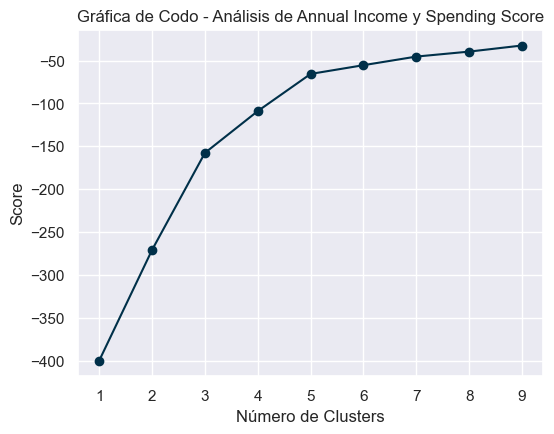

In [147]:
#Se realiza gráfica de codo para identificar valor de K

X2 = data_new[['Annual Income (k$)', 'Spending Score (1-100)']]

Nc2 = range(1, 10)
kmeans2 = [KMeans(n_clusters=i) for i in Nc]
kmeans2
score2 = [kmeans2[i].fit(X2).score(X2) for i in range(len(kmeans2))]
score2
plt.plot(Nc2, score2, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo - Análisis de Annual Income y Spending Score')
plt.show()

In [151]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento). Se toma este valor considerando que se realizan análisis con valores K iguales a 6, 7, 8, 9 y 10 y, para cada uno, se analizan los valores obtenidos para el Coeficiente Silhouette, el Indice Calinski Harabasz y el Indice Davies Bouldin. Estas 3 métricas se comparan para los diferentes valores de K y se elige el valor K que brinda mejores resultados.  

Modelo2 = KMeans(n_clusters=5, random_state=0)
Modelo2.fit(X2)

KMeans(n_clusters=5, random_state=0)

## 5.2. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [167]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo2.labels_
X2["Cluster"] = Modelo2.labels_ 
print (X2)

# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones2 = len(X2)
X_2 = X2.drop('Cluster', axis=1)
clusters2 = X2['Cluster']

# Se calculan las métricas
sil_score = silhouette_score(X_2, clusters2)
calinski_score = calinski_harabasz_score(X_2, clusters2)
davies_score = davies_bouldin_score(X_2, clusters2)
inertia = Modelo2.inertia_

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score],
    ["Inertia", inertia]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

     Annual Income (k$)  Spending Score (1-100)  Cluster
0             -1.738999               -0.434801        3
1             -1.738999                1.195704        4
2             -1.700830               -1.715913        3
3             -1.700830                1.040418        4
4             -1.662660               -0.395980        3
..                  ...                     ...      ...
195            2.268791                1.118061        1
196            2.497807               -0.861839        2
197            2.497807                0.923953        1
198            2.917671               -1.250054        2
199            2.917671                1.273347        1

[200 rows x 3 columns]
+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.5546571631111091 |
| Indice Calinski Harabasz | 248.649320015

## 5.3. Realizar la gráfica que permite visualizar los resultados del modelo

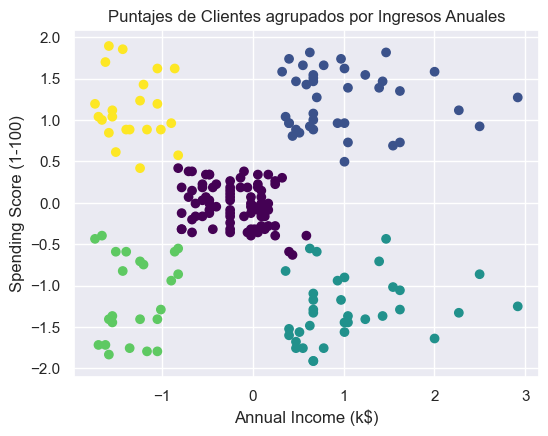

In [177]:
plt.scatter(X2['Annual Income (k$)'], X2['Spending Score (1-100)'], c=X2['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Puntajes de Clientes agrupados por Ingresos Anuales')
plt.show()

## 5.4. Interpretación de los resultados obtenidos

In [186]:
# Coeficiente Silhouette: Un valor de aproximadamente 0.55 indica una mejor calidad de clustering en comparación con el análisis anterior (donde el Silhouette era ~0.41). Esto sugiere que los puntos están en general más cerca de su propio clúster y más lejos de los clústeres vecinos.
# Índice Calinski-Harabasz: Un valor de aproximadamente 248.65 es más alto que el obtenido en el análisis anterior (~212.35). Esto refuerza la idea de una mejor estructura de los clústeres, con mayor separación entre ellos en términos de varianza.
# Índice Davies-Bouldin: Un valor de aproximadamente 0.57 es considerablemente más bajo que el obtenido anteriormente (~0.91). Esto indica una menor similitud promedio entre cada clúster y su clúster más similar, lo que sugiere clústeres más distintos y mejor separados.
# Gráfico de Dispersión: El gráfico muestra los "Puntajes de Clientes agrupados por Ingresos Anuales". Al igual que antes, cada punto representa un cliente y el color indica el clúster asignado por el modelo K-Means. Podemos observar la formación de cinco clústeres que parecen tener una estructura más clara en comparación con la agrupación por Edad. Este gráfico presenta la siguiente segmentación: 
# - Clúster Amarillo: Clientes con ingresos anuales bajos y puntajes de gasto altos.
# - Clúster Verde: Clientes con ingresos anuales bajos y puntajes de gasto bajos.
# - Clúster Morado: Clientes con ingresos anuales medios y puntajes de gasto medios.
# - Clúster Azul Oscuro: Clientes con ingresos anuales altos y puntajes de gasto altos.
# - Clúster Turquesa: Clientes con ingresos anuales altos y puntajes de gasto bajos.

## 6. Conclusión general

In [ ]:
# El modelo K-Means parece haber realizado una mejor segmentación de los clientes cuando se consideran sus Ingresos Anuales en relación con su Puntaje de Gasto, en comparación con la segmentación basada en la Edad. Las métricas de evaluación respaldan esta observación, indicando clústeres más separados y compactos.